Import reqiured libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the cifar10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 157s 1us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [7]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

Normalizing the data

In [8]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [10]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

Split the data train and validation set

In [11]:
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42, shuffle=True)

CNN Model Building

In [12]:
def create_cnn_model():
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="Same"))
    cnn_model.add(layers.MaxPooling2D(2,2))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation='relu'))
    cnn_model.add(layers.Dropout(0.5))
    cnn_model.add(layers.Dense(10, activation='softmax'))
    return cnn_model

Epoch 1/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.7807 - accuracy: 0.3311 - val_loss: 1.3974 - val_accuracy: 0.4982
Epoch 2/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4859 - accuracy: 0.4527 - val_loss: 1.2747 - val_accuracy: 0.5437
Epoch 3/20
1250/1250 [==============================] - 24s 19ms/step - loss: 1.3621 - accuracy: 0.4988 - val_loss: 1.1373 - val_accuracy: 0.5973
Epoch 4/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2826 - accuracy: 0.5317 - val_loss: 1.1101 - val_accuracy: 0.6148
Epoch 5/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2201 - accuracy: 0.5602 - val_loss: 1.0254 - val_accuracy: 0.6410
Epoch 6/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1658 - accuracy: 0.5778 - val_loss: 0.9991 - val_accuracy: 0.6504
Epoch 7/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1200 - accuracy: 0.5948 - val_loss: 0.9783 -

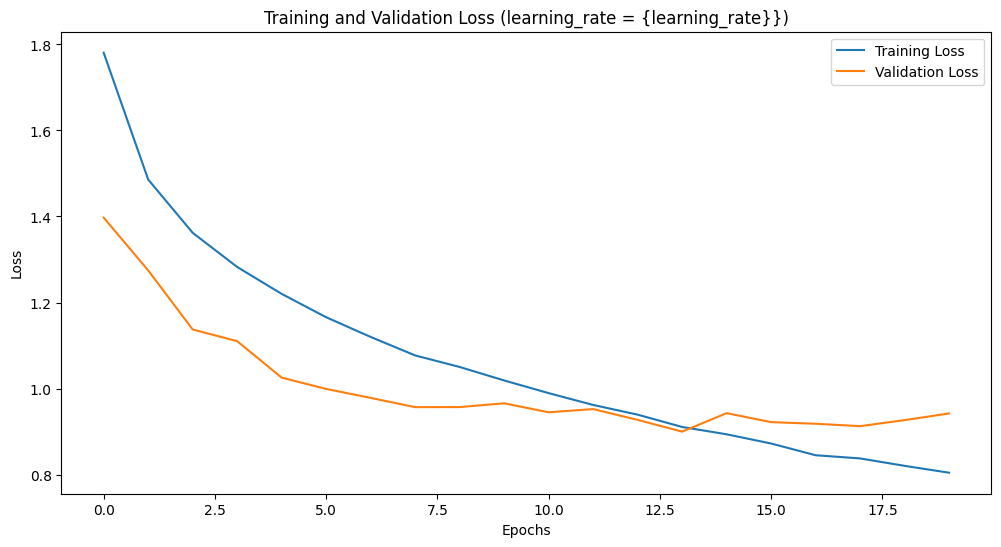

In [13]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_data=(valid_images, valid_labels))

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = {learning_rate}})')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)

# Calculate precision and recall for train data
train_precision = precision_score(train_labels, train_predicted_labels, average='macro')
train_recall = recall_score(train_labels, train_predicted_labels, average='macro')

# Calculate precision and recall for test data
test_precision = precision_score(test_labels, test_predicted_labels, average='macro')
test_recall = recall_score(test_labels, test_predicted_labels, average='macro')

# Print or use precision and recall values as needed
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

print("\nTraining Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Training Confusion Matrix:")
print(train_confusion_mtx)
print("\n\nTesting Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 2s 5ms/step
Train Precision: 0.8299581089745827
Train Recall: 0.8260569449487164
Test Precision: 0.6934530020468884
Test Recall: 0.687

Training Accuracy: 82.62%
Training Confusion Matrix:
[[3542    9  157   55   26    2    1   25  145   65]
 [  52 3571    6   25    7    7   11    6   60  276]
 [ 168    1 2823  190  404  185  100   62   32    5]
 [  34    1  141 2892  180  561   90   44   22   12]
 [  70    0  217  126 3320   67   46  193   20    8]
 [   7    2  151  789  136 2756   31  102    8    3]
 [  14    1  120  231  225   64 3325    7    9    8]
 [  10    0   60   81  136  183    3 3516    9    8]
 [ 211   18   30   32   10    2    9    5 3640   26]
 [  55   91    6   41    6   13    4   19   63 3662]]


Testing Accuracy: 68.70%
Testing Confusion Matrix:
[[769   5  68  20  20   6   5  19  57  31]
 [ 28 754   5  16   5   6  10   4  35 137]
 [ 84   1 538  86 115  69  52  33  14   8]
 [ 19   5  68 532  86 174  52  33  20  11]
 [ 36   2  9

Plot training and validation loss for different learning rates

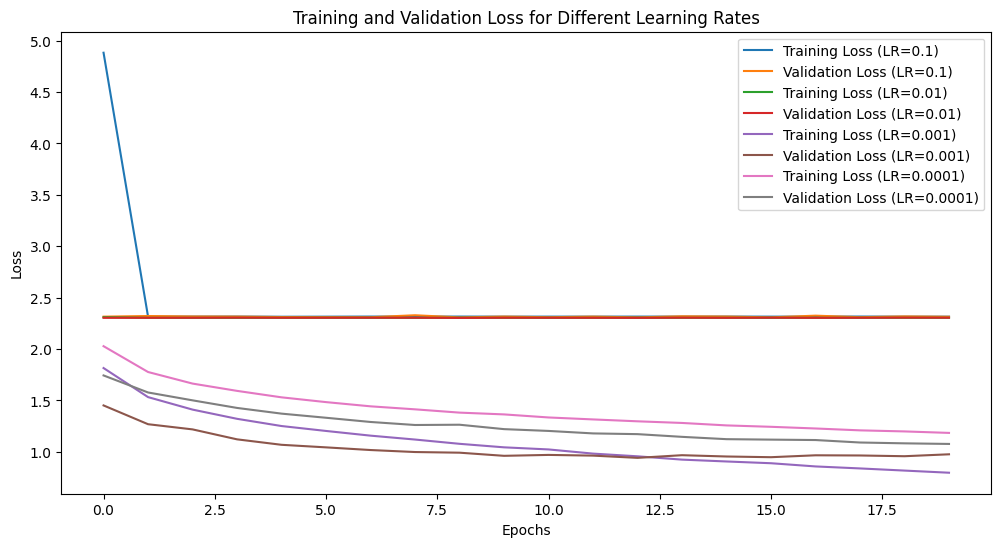

In [15]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

plt.figure(figsize=(12, 6))

for lr in learning_rates:
    cnn_model = create_cnn_model()
    cnn_model.compile(optimizer=Adam(learning_rate=lr),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    # Train the model for 20 epochs
    history = cnn_model.fit(train_images,
                            train_labels,
                            epochs=20,
                            validation_split=0.2,
                            verbose=0)

    # Plot training and validation loss
    plt.plot(history.history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for Different Learning Rates')
plt.show()

# Using DenseNet and VGG

In [16]:
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
train_labels_encoded = to_categorical(train_labels, num_classes=10)
test_labels_encoded = to_categorical(test_labels, num_classes=10)
valid_labels_encoded = to_categorical(valid_labels, num_classes=10)

In [18]:
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = densenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
densenet_model = Model(inputs=densenet_base.input, outputs=predictions)

for layer in densenet_base.layers:
    layer.trainable = False

densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_checkpoint = ModelCheckpoint('densenet_fine_tuned.h5', save_best_only=True)
densenet_history = densenet_model.fit(train_images, train_labels_encoded, epochs=20, validation_data=(valid_images, valid_labels_encoded), callbacks=[densenet_checkpoint])

29084464/29084464 [==============================] - 28s 1us/step
Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 1.2469 - accuracy: 0.5626

c:\Python311\cv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 135s 105ms/step - loss: 1.2469 - accuracy: 0.5626 - val_loss: 1.1259 - val_accuracy: 0.6039
Epoch 2/20
1250/1250 [==============================] - 123s 99ms/step - loss: 1.0396 - accuracy: 0.6319 - val_loss: 1.0494 - val_accuracy: 0.6255
Epoch 3/20
1250/1250 [==============================] - 123s 98ms/step - loss: 0.9535 - accuracy: 0.6640 - val_loss: 1.0311 - val_accuracy: 0.6413
Epoch 4/20
1250/1250 [==============================] - 123s 99ms/step - loss: 0.8869 - accuracy: 0.6863 - val_loss: 1.0364 - val_accuracy: 0.6396
Epoch 5/20
1250/1250 [==============================] - 121s 97ms/step - loss: 0.8205 - accuracy: 0.7075 - val_loss: 1.0527 - val_accuracy: 0.6459
Epoch 6/20
1250/1250 [==============================] - 122s 98ms/step - loss: 0.7590 - accuracy: 0.7320 - val_loss: 1.0485 - val_accuracy: 0.6481
Epoch 7/20
1250/1250 [==============================] - 124s 99ms/step - loss: 0.7027 - accuracy: 0.7496 - val_loss: 1.0824 - va

In [19]:
densenet_train_loss = densenet_history.history['loss']
densenet_val_loss = densenet_history.history['val_loss']

densenet_model.load_weights('densenet_fine_tuned.h5')
densenet_test_loss, densenet_test_acc = densenet_model.evaluate(test_images, test_labels_encoded)

print(f'DenseNet Test Accuracy: {densenet_test_acc}')

313/313 [==============================] - 25s 81ms/step - loss: 1.0456 - accuracy: 0.6359
DenseNet Test Accuracy: 0.6359000205993652


In [20]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

for layer in vgg_base.layers:
    layer.trainable = False

vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg_checkpoint = ModelCheckpoint('vgg_fine_tuned.h5', save_best_only=True)
vgg_history = vgg_model.fit(train_images, train_labels_encoded, epochs=10, validation_data=(test_images, test_labels_encoded), callbacks=[vgg_checkpoint])

58889256/58889256 [==============================] - 56s 1us/step
Epoch 1/10
1250/1250 [==============================] - 99s 78ms/step - loss: 1.3680 - accuracy: 0.5233 - val_loss: 1.2721 - val_accuracy: 0.5533
Epoch 2/10
1250/1250 [==============================] - 101s 81ms/step - loss: 1.1828 - accuracy: 0.5894 - val_loss: 1.1905 - val_accuracy: 0.5794
Epoch 3/10
1250/1250 [==============================] - 101s 80ms/step - loss: 1.1185 - accuracy: 0.6105 - val_loss: 1.1734 - val_accuracy: 0.5893
Epoch 4/10
1250/1250 [==============================] - 102s 81ms/step - loss: 1.0675 - accuracy: 0.6269 - val_loss: 1.1566 - val_accuracy: 0.5959
Epoch 5/10
1250/1250 [==============================] - 102s 81ms/step - loss: 1.0239 - accuracy: 0.6427 - val_loss: 1.1436 - val_accuracy: 0.5973
Epoch 6/10
1250/1250 [==============================] - 100s 80ms/step - loss: 0.9855 - accuracy: 0.6565 - val_loss: 1.1456 - val_accuracy: 0.6037
Epoch 7/10
1250/1250 [==============================]

In [21]:
vgg_train_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']

vgg_model.load_weights('vgg_fine_tuned.h5')
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_images, test_labels_encoded)
print(f'VGG Test Accuracy: {vgg_test_acc}')

313/313 [==============================] - 20s 63ms/step - loss: 1.1301 - accuracy: 0.6167
VGG Test Accuracy: 0.6166999936103821
